In [18]:
# Import dependencies
import pandas as pd
import numpy as np
import seaborn as sns

In [19]:
# Membuka data hepatitis_dataset
df = pd.read_csv('FINAL DATASET.csv')
df

,BB,TB,USIA (bulan),GIZI,Kelamin
0,14.8,98.8,47,N,L
1,13.7,95.3,31,N,L
2,12.5,93.5,28,GK,L
3,13.4,93.0,27,N,L
4,13.8,92.0,24,N,L
...,...,...,...,...,...
331,10.0,82.3,26,N,P
332,10.2,82.3,26,N,P
333,11.0,81.8,25,N,P
334,10.3,81.0,25,N,P


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BB            336 non-null    float64
 1   TB            336 non-null    float64
 2   USIA (bulan)  336 non-null    int64  
 3   GIZI          336 non-null    object 
 4   Kelamin       336 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 13.2+ KB


In [21]:
df.describe(include='number') #Summary kolom yang berisi data numerik

,BB,TB,USIA (bulan)
count,336.000000,336.000000,336.000000
mean,12.672768,88.766369,31.785714
std,4.294520,14.633459,19.204211
min,3.800000,52.000000,1.000000
25%,9.575000,76.950000,15.000000
50%,12.300000,89.200000,31.000000
75%,15.300000,100.000000,47.000000
max,36.100000,128.000000,72.000000


In [22]:
df.describe(include='object') #Summary kolom yang berisi data String

,GIZI,Kelamin
count,336,336
unique,6,2
top,N,L
freq,251,180


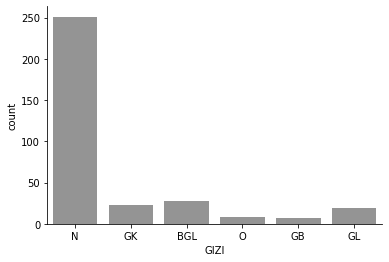

In [23]:
sns.countplot(x='GIZI',data=df, color='#949494')
sns.despine()

In [24]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler


labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
df['Kelamin'] = labelencoder.fit_transform(df['Kelamin']) #fitting and transforming the desired categorical column.
df['GIZI'] = labelencoder.fit_transform(df['GIZI'])

In [25]:
df.head()

,BB,TB,USIA (bulan),GIZI,Kelamin
0,14.8,98.8,47,4,0
1,13.7,95.3,31,4,0
2,12.5,93.5,28,2,0
3,13.4,93.0,27,4,0
4,13.8,92.0,24,4,0


In [26]:
x_klas = df.drop(columns='GIZI')
y_klas = df['GIZI']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_klas, y_klas, test_size=0.2,random_state=109)

In [28]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [30]:
y_pred = clf.predict(X_test)

In [31]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8676470588235294
